In [1]:
#importing libraries to connect to bigquery and convert to df
from google.cloud import bigquery
from google.oauth2 import service_account
import os
import db_dtypes

#libraries to manipulate data
import pandas as pd
from datetime import datetime
import numpy as np

#libraries for visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#libraries for stats analysis
from scipy import stats
import statistics

# *Getting data from Bigquery*

In [2]:
#client defined
client = bigquery.Client.from_service_account_json(r'C:\Users\ruskin.dantra\Downloads\possible-mini-project-2eee26ad7cb7.json',project='possible-mini-project')

In [3]:
#table with most info required - department, sale price, cost price and various times
dfcollectivetable = client.query("""
  SELECT oi.user_id as user_id, p.cost as cost, p.retail_price as retailprice, p.category as product_category, p.department as department, p.brand as brand, oi.created_at as created_at, oi.shipped_at as shipped_at, oi.sale_price as sale_price, oi.status as status, oi.returned_at as returnedat, p.distribution_center_id as distcenter, 
  user.country as country, user.gender as gender
FROM `bigquery-public-data.thelook_ecommerce.products` as p 
JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
ON p.id = oi.product_id
JOIN `bigquery-public-data.thelook_ecommerce.users` as user
ON oi.user_id=user.id  
""").to_dataframe()

In [4]:
#query inventory table to datframe
dfinventory = client.query("""
 SELECT *
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` 
 """).to_dataframe()

In [5]:
#This query gives us the products table as a dataframe
dfproducts = client.query("""
   SELECT *
   
FROM `bigquery-public-data.thelook_ecommerce.products` 
 """).to_dataframe()

In [6]:
#This query gives us the order_items table as a dataframe
dforder_items = client.query("""SELECT * FROM `bigquery-public-data.thelook_ecommerce.order_items`""").to_dataframe()

In [7]:
#This query gives us the events table as a dataframe
dfevents = client.query("""SELECT * FROM `bigquery-public-data.thelook_ecommerce.events`""").to_dataframe()

In [8]:
#this query gives us the orders table as a dataframe
dforders = client.query("""
   SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders` 

 """).to_dataframe()

In [9]:
#this query gives us the users table as a dataframe
dfusers = client.query("""
   SELECT *
FROM `bigquery-public-data.thelook_ecommerce.users` 

 """).to_dataframe()

# *Checking number of rows and columns*

In [10]:
dforder_items.shape

(181269, 11)

In [11]:
dforders.shape

(124678, 9)

In [12]:
dfproducts.shape

(29120, 9)

In [13]:
dfinventory.shape

(489510, 12)

In [14]:
dfusers.shape

(100000, 15)

In [15]:
dfevents.shape

(2428055, 13)

In [16]:
dfcollectivetable.shape

(181269, 14)

**Collective table has same number of rows as order items.  This shows that the result is what we wanted, order items linked to product tables and users table.**

# *Initial exploration*

In [17]:
#check null values in orders table
dforders.isnull().sum()
dforders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,15,11,Shipped,F,2022-08-18 12:13:00+00:00,NaT,2022-08-20 21:02:00+00:00,NaT,1
1,18,15,Shipped,F,2022-12-02 16:11:00+00:00,NaT,2022-12-05 00:29:00+00:00,NaT,1
2,26,21,Shipped,F,2021-10-18 18:17:00+00:00,NaT,2021-10-21 10:46:00+00:00,NaT,1
3,27,22,Shipped,F,2022-07-28 11:56:00+00:00,NaT,2022-07-30 05:46:00+00:00,NaT,1
4,53,38,Shipped,F,2019-08-16 00:36:00+00:00,NaT,2019-08-18 06:12:00+00:00,NaT,2
...,...,...,...,...,...,...,...,...,...
124673,124585,99938,Processing,M,2022-02-24 00:21:00+00:00,NaT,NaT,NaT,2
124674,124591,99940,Processing,M,2022-12-01 14:28:00+00:00,NaT,NaT,NaT,1
124675,124601,99946,Processing,M,2022-03-03 09:05:00+00:00,NaT,NaT,NaT,1
124676,124614,99953,Processing,M,2022-01-01 15:19:00+00:00,NaT,NaT,NaT,1


**Many values null in returned_at this is sensible. it means the item has not been returned. Many values null in shipped_At again this implies item is yet to be shipped.  Many values null in delivered_at, implies item is in the process of delivery depending on shipping status - could be still processing.**

In [18]:
#check null values in products table
dfproducts.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [19]:
#empty values in brand, we are not going to fill them because this could be because brand is unknown
#we need to create a new feature profit

In [19]:
#check null values in users table
dfusers.isnull().sum()

id                0
first_name        0
last_name         0
email             0
age               0
gender            0
state             0
street_address    0
postal_code       0
city              0
country           0
latitude          0
longitude         0
traffic_source    0
created_at        0
dtype: int64

In [20]:
#check null values in users table
dfevents.isnull().sum()

id                       0
user_id            1124790
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                     0
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

**Data is fairly clean owing to its nature(synthetic). There is no need to fill missing values**

# *Creating new features*

In [55]:
# We will create new features in the data
#1. profit per unit
#2. customer type - new or existing
#3. percentage discount applied

 **Profit**

In [21]:
dfcollectivetable['profit'] = dfcollectivetable['sale_price']-dfcollectivetable['cost']

In [22]:
dfcollectivetable['profit']

0          5.66400
1          5.66400
2          5.66400
3          5.66400
4          5.66400
            ...   
181264    13.45704
181265    13.45704
181266    13.45704
181267    13.45704
181268    13.45704
Name: profit, Length: 181269, dtype: float64


**Created a column with profit per item**

**Customer Type**

In [23]:
#checks if user_id is duplicated and assigns new or existing labels
#first set created_At as index to ensure data is ordered by timestamp
orders_daily = dfcollectivetable.set_index('created_at')
orders_daily = orders_daily.assign(custType=np.where(~orders_daily['user_id'].duplicated(),'New','Existing'))

In [24]:
#created a column with customer type

**Percentage discount**

In [25]:
#created a percent disc column
orders_daily['percentDisc'] = ((orders_daily['retailprice']-orders_daily['sale_price'])/orders_daily['retailprice'])*100

In [26]:
orders_daily['percentDisc']

created_at
2021-09-08 14:32:00+00:00    0.0
2022-12-04 03:36:03+00:00    0.0
2021-02-21 04:08:35+00:00    0.0
2022-12-09 02:47:33+00:00    0.0
2022-03-18 04:43:55+00:00    0.0
                            ... 
2022-07-24 01:26:29+00:00    0.0
2022-10-05 13:17:37+00:00    0.0
2022-11-01 15:00:58+00:00    0.0
2022-06-21 13:28:02+00:00    0.0
2022-05-22 23:55:46+00:00    0.0
Name: percentDisc, Length: 181269, dtype: float64

In [27]:
sns.set()

# *Profit and Revenue analysis*

In [28]:
#profit over time
profitOvertime = orders_daily.groupby([orders_daily.index.year, orders_daily.index.month])['profit'].sum()



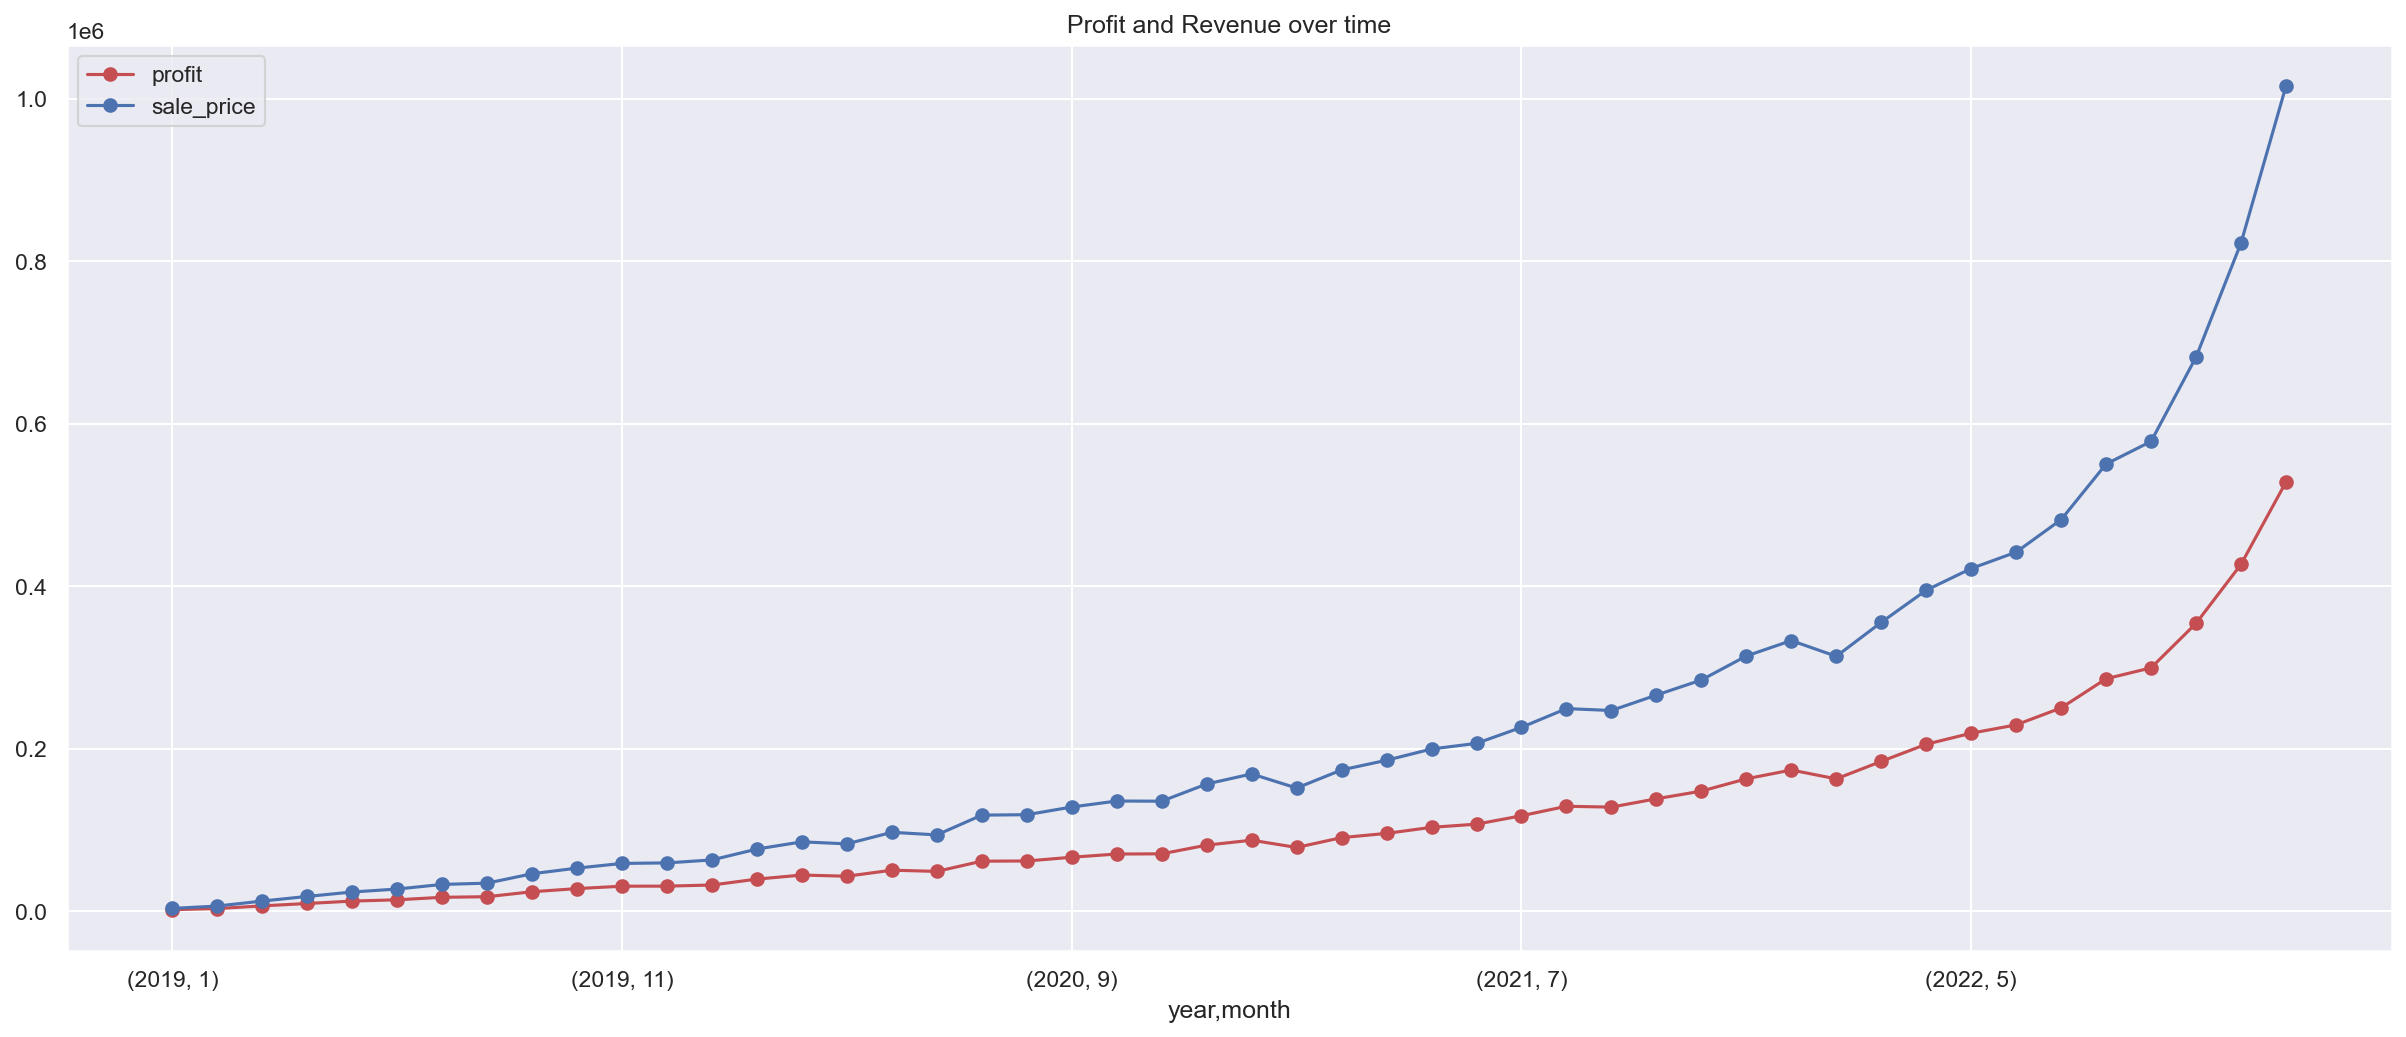

In [29]:
#revenue over time
orders_dailyrevenue = orders_daily.groupby([orders_daily.index.year, orders_daily.index.month])['sale_price'].sum()
plt.figure(figsize=(20,8), dpi=150)
profitOvertime.plot(color='r', marker='o')
orders_dailyrevenue.plot(color='b',marker='o')
plt.title('Profit and Revenue over time')
plt.legend()
plt.xlabel('year,month')
plt.savefig('profitRevenue')


**CUSTOMER NUMBERS - GROWTH**

In [30]:
#growth by customer type
dfnumber_grouped_custType = (orders_daily.groupby([(orders_daily.index.year), (orders_daily.index.month),'custType' ])).size().to_frame()

In [31]:
dfnumber_grouped_custType

0
created_at created_at custType      
2019       1          Existing    26
                      New         20
           2          Existing    53
                      New         53
           3          Existing   122
...                              ...
2022       10         New       5196
           11         Existing  7765
                      New       6134
           12         Existing  9868
                      New       7540

[96 rows x 1 columns]

In [32]:
#unstacking the df
unstackednumberBycustType = dfnumber_grouped_custType.unstack(level=2)

In [33]:
unstackednumberBycustType 

0      
custType              Existing   New
created_at created_at               
2019       1                26    20
           2                53    53
           3               122    97
           4               166   132
           5               225   167
           6               236   187
           7               299   229
           8               336   263
           9               404   351
           10              467   374
           11              524   415
           12              594   440
2020       1               629   481
           2               701   543
           3               798   606
           4               789   627
           5               905   738
           6               842   711
           7              1070   822
           8              1133   852
           9              1230   975
           10             1273  1038
           11             1261  1037
           12             1424  1165
2021       1              1568  1246
           2              1432  1109
           3              1624  1317
           4              1736  1384
           5              1891  1517
           6              2009  1492
           7              2258  1652
           8              2291  1833
           9              2444  1838
           10             2582  1941
           11             2663  2139
           12             2886  2297
2022       1              3080  2406
           2              2920  2373
           3              3431  2706
           4              3678  2876
           5              3854  3114
           6              4188  3311
           7              4696  3577
           8              5229  4129
           9              5515  4337
           10             6367  5196
           11             7765  6134
           12             9868  7540

**REVENUE - GROWTH BY TYPE OF CUSTOMER**

In [34]:
#revenue by cust type
dfsales_grouped_custType = (orders_daily.groupby([(orders_daily.index.year), (orders_daily.index.month),'custType' ]))['sale_price'].sum().to_frame()

In [35]:
dfsales_grouped_custType

sale_price
created_at created_at custType               
2019       1          Existing    1537.589998
                      New         1705.679987
           2          Existing    2700.340003
                      New         3433.789994
           3          Existing    6744.629979
...                                       ...
2022       10         New       304746.500385
           11         Existing  458957.200401
                      New       363297.300379
           12         Existing  568951.130536
                      New       446451.310472

[96 rows x 1 columns]

In [36]:
dfsalesunstacked_custType = dfsales_grouped_custType.unstack(level=2)

In [37]:
dfsalesunstacked_custType

sale_price               
custType                    Existing            New
created_at created_at                              
2019       1             1537.589998    1705.679987
           2             2700.340003    3433.789994
           3             6744.629979    5551.459996
           4             8910.849991    9069.420034
           5            13911.350023    9521.630009
           6            15581.509944   11504.149992
           7            16956.470019   15798.250025
           8            17993.760023   16341.000010
           9            23267.710010   22659.490039
           10           31027.040005   21818.000049
           11           31802.919981   26805.950014
           12           32402.280012   26858.080045
2020       1            33310.779999   29596.320040
           2            43615.330092   32695.450047
           3            49491.000029   35684.989984
           4            46822.360009   35869.870057
           5            54767.819997   42137.790020
           6            51903.990066   41822.160083
           7            64530.700116   53535.950080
           8            66183.580053   52378.550026
           9            68062.400099   59992.500125
           10           76323.150185   59075.680022
           11           76012.520077   59198.140070
           12           84060.980098   72303.920102
2021       1            92004.920112   76764.170147
           2            87358.890047   64020.380065
           3            95725.020125   77942.760129
           4           100377.370045   85216.940120
           5           111069.169930   88367.320060
           6           116808.480075   89563.900016
           7           128255.660114   97851.700165
           8           134750.980054  114421.570107
           9           142709.510132  104104.180084
           10          147302.220198  118498.290115
           11          156255.650052  128109.040114
           12          179769.780145  134133.760330
2022       1           189293.740287  143601.150242
           2           176956.680094  136566.860127
           3           199765.540194  155535.760143
           4           218295.020162  176586.810216
           5           239195.480237  182394.750149
           6           251183.960092  190551.660214
           7           269847.380404  211925.840173
           8           307253.160335  242938.120267
           9           327811.550177  250201.980217
           10          377036.840395  304746.500385
           11          458957.200401  363297.300379
           12          568951.130536  446451.310472

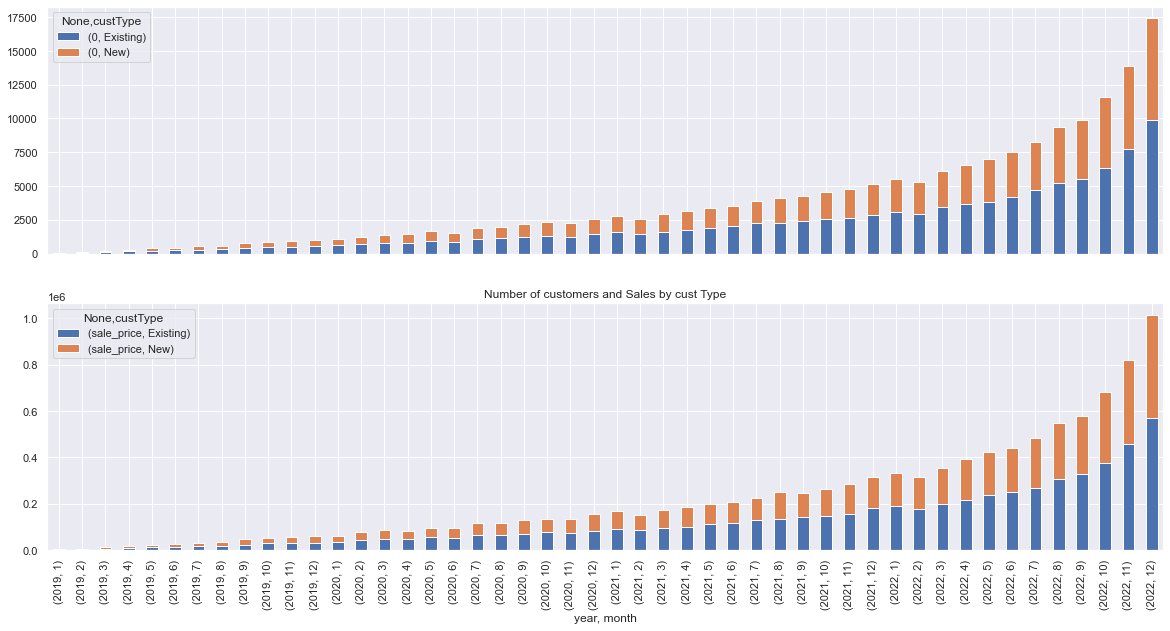

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)
unstackednumberBycustType.plot(kind='bar', stacked=True, ax=axes[0])
dfsalesunstacked_custType.plot(kind='bar', stacked=True, ax=axes[1])
plt.xlabel('year, month')
plt.title('Number of customers and Sales by cust Type')
plt.savefig('numberofCustandsalesbyType')

**COMMENT: Steady growth for both new and existing customers, both for revenue and numbers**

**Time between orders**

In [39]:
#we will first make a new column of created at and then shift the order date by 1 row(after grouping by user id), 
#then we will find diff between created_at and the shifted order date.
dforders.head()
dfordersindexed= dforders.set_index('created_at')
dfordersindexed['orderDate'] = dfordersindexed.index

In [40]:
dfordersindexed=dfordersindexed.sort_values(['user_id','orderDate'])
dfordersindexed['last_order']=dfordersindexed.groupby(['user_id'])['orderDate'].shift()
                                            

In [41]:
dfordersindexed.head()
dfordersindexed['timebetweenorders'] = (dfordersindexed['orderDate']-dfordersindexed['last_order']).dt.days

In [42]:
dfordersindexed.dtypes

order_id                           Int64
user_id                            Int64
status                            object
gender                            object
returned_at          datetime64[ns, UTC]
shipped_at           datetime64[ns, UTC]
delivered_at         datetime64[ns, UTC]
num_of_item                        Int64
orderDate            datetime64[ns, UTC]
last_order           datetime64[ns, UTC]
timebetweenorders                float64
dtype: object

In [43]:
dfordersindexed['timebetweenorders'].mean()
dforders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,15,11,Shipped,F,2022-08-18 12:13:00+00:00,NaT,2022-08-20 21:02:00+00:00,NaT,1
1,18,15,Shipped,F,2022-12-02 16:11:00+00:00,NaT,2022-12-05 00:29:00+00:00,NaT,1
2,26,21,Shipped,F,2021-10-18 18:17:00+00:00,NaT,2021-10-21 10:46:00+00:00,NaT,1
3,27,22,Shipped,F,2022-07-28 11:56:00+00:00,NaT,2022-07-30 05:46:00+00:00,NaT,1
4,53,38,Shipped,F,2019-08-16 00:36:00+00:00,NaT,2019-08-18 06:12:00+00:00,NaT,2
...,...,...,...,...,...,...,...,...,...
124673,124585,99938,Processing,M,2022-02-24 00:21:00+00:00,NaT,NaT,NaT,2
124674,124591,99940,Processing,M,2022-12-01 14:28:00+00:00,NaT,NaT,NaT,1
124675,124601,99946,Processing,M,2022-03-03 09:05:00+00:00,NaT,NaT,NaT,1
124676,124614,99953,Processing,M,2022-01-01 15:19:00+00:00,NaT,NaT,NaT,1


In [44]:
dfordersindexed['last_order'].dropna()

created_at
2022-12-11 03:06:00+00:00                 2022-12-05 03:06:00+00:00
2022-12-19 07:28:00+00:00                 2022-02-16 07:28:00+00:00
2021-09-03 11:00:00+00:00                 2019-12-15 11:00:00+00:00
2022-09-07 05:01:00+00:00                 2021-05-01 05:01:00+00:00
2021-04-11 09:54:00+00:00                 2020-04-03 09:54:00+00:00
                                                 ...               
2022-12-20 03:53:45.175865+00:00   2022-12-20 03:53:45.175865+00:00
2022-12-20 03:53:45.175865+00:00   2022-12-20 03:53:45.175865+00:00
2022-08-08 11:16:00+00:00                 2021-09-01 11:16:00+00:00
2022-12-13 13:20:00+00:00                 2022-07-04 13:20:00+00:00
2021-11-20 10:08:00+00:00                 2020-11-01 10:08:00+00:00
Name: last_order, Length: 44891, dtype: datetime64[ns, UTC]

In [45]:
dfordersindexed['timebetweenorders'] 

created_at
2022-03-17 14:50:00+00:00      NaN
2022-12-05 03:06:00+00:00      NaN
2022-12-11 03:06:00+00:00      6.0
2022-02-16 07:28:00+00:00      NaN
2022-12-19 07:28:00+00:00    306.0
                             ...  
2020-09-02 08:52:00+00:00      NaN
2022-07-17 12:10:00+00:00      NaN
2020-11-01 10:08:00+00:00      NaN
2021-11-20 10:08:00+00:00    384.0
2022-07-04 05:08:00+00:00      NaN
Name: timebetweenorders, Length: 124678, dtype: float64

<AxesSubplot:ylabel='Frequency'>

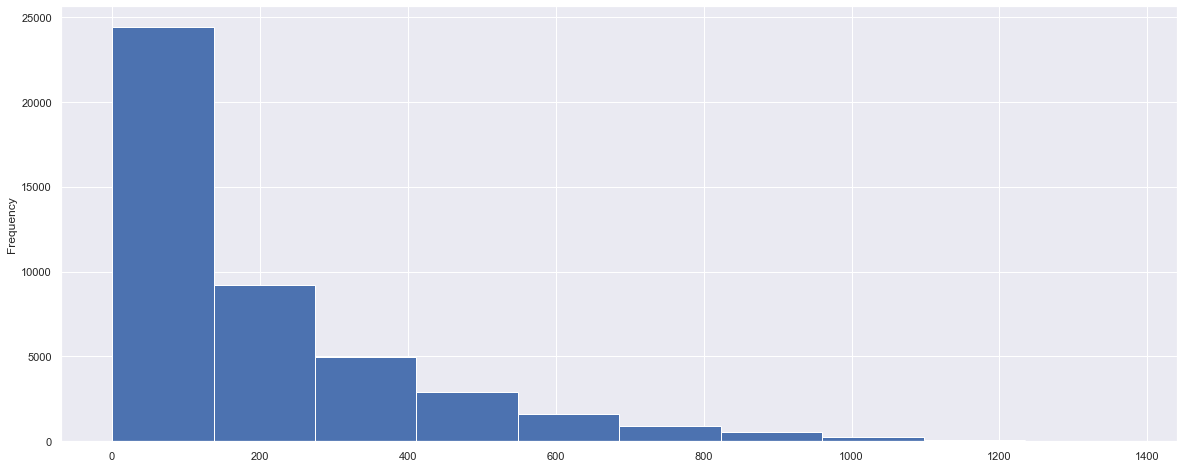

In [46]:
timeInbetween = dfordersindexed['timebetweenorders']
timeInbetween.dropna().plot(kind='hist', bins=10,figsize=(20,8))


In [47]:
timeInbetween.mean()

192.14296852375756

**Comment: Left skewed data, average time in between orders is 190days**

In [56]:
numberofOrders = dforders.groupby('user_id')['order_id'].nunique()
numberofOrders.value_counts

<bound method IndexOpsMixin.value_counts of user_id
1         1
3         2
4         2
5         1
6         1
         ..
99996     1
99997     1
99998     1
99999     2
100000    1
Name: order_id, Length: 79787, dtype: int64>

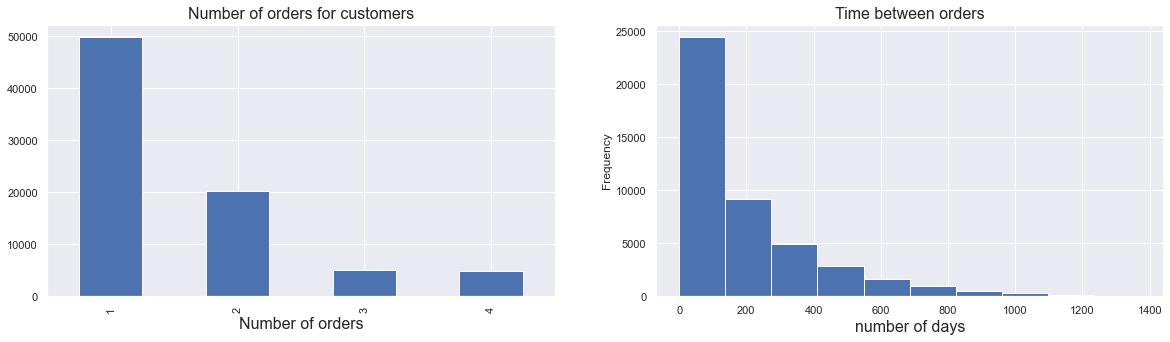

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
#plotting time in between and number of orders
timeInbetween.plot(kind='hist', bins =10, ax=axes[1])
numberofOrders.value_counts(sort=False).plot(kind='bar',ax=axes[0])
axes[1].set_title('Time between orders', fontsize=16)
axes[0].set_title('Number of orders for customers',fontsize=16)
axes[1].set_xlabel('number of days', fontsize=16)
axes[0].set_xlabel('Number of orders',fontsize=16)
plt.savefig('noOfordersandtimebetween')

**Comment: Most common number of orders per customer is 1 and average time between orders for existing customers is almost 180 days**

# *Slice the dataframe by customer type*

In [59]:
orders_daily_count=orders_daily.groupby('user_id').size()

In [60]:
orders_daily_count.shape

(79787,)

In [61]:
custType_new = orders_daily.query("custType == 'New'")
custType_existing =orders_daily.query("custType == 'Existing'")
custType_existing


,user_id,cost,retailprice,product_category,department,brand,shipped_at,sale_price,status,returnedat,distcenter,country,gender,profit,custType,percentDisc
created_at,,,,,,,,,,,,,,,,
2022-04-08 07:13:35+00:00,10684,66.120000,120.000000,Jumpsuits & Rompers,Women,Queen,2022-04-10 22:48:00+00:00,120.000000,Shipped,NaT,3,Brasil,F,53.880000,Existing,0.0
2022-09-23 12:15:29+00:00,40576,8.537760,17.639999,Jumpsuits & Rompers,Women,Jenni,2022-09-25 07:21:00+00:00,17.639999,Returned,2022-09-29 11:33:00+00:00,8,United States,F,9.102240,Existing,0.0
2021-04-12 03:18:47+00:00,80811,70.584573,129.990005,Jumpsuits & Rompers,Women,VA VA VOOM,NaT,129.990005,Processing,NaT,3,Japan,F,59.405433,Existing,0.0
2021-10-04 05:22:30+00:00,65684,19.349471,34.990002,Jumpsuits & Rompers,Women,MANGO,NaT,34.990002,Processing,NaT,9,China,F,15.640531,Existing,0.0
2022-12-19 07:09:00+00:00,80051,35.798491,54.990002,Clothing Sets,Women,Only Necessities,NaT,54.990002,Cancelled,NaT,4,Spain,F,19.191511,Existing,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-02 02:20:07+00:00,95045,5.978830,12.430000,Fashion Hoodies & Sweatshirts,Women,Allegra K,NaT,12.430000,Processing,NaT,9,China,F,6.451170,Existing,0.0
2021-11-27 23:52:18+00:00,23831,10.402960,23.860001,Fashion Hoodies & Sweatshirts,Women,Allegra K,2021-11-30 11:16:00+00:00,23.860001,Shipped,NaT,9,Spain,F,13.457040,Existing,0.0
2022-11-01 15:00:58+00:00,7429,10.402960,23.860001,Fashion Hoodies & Sweatshirts,Women,Allegra K,2022-11-03 12:30:00+00:00,23.860001,Returned,2022-11-08 13:00:00+00:00,9,China,F,13.457040,Existing,0.0


**get the customer numbers by month for each type**

In [62]:
newCust_typeTS = custType_new.groupby([custType_new.index.year, custType_new.index.month])['user_id'].nunique()

In [63]:
exist_Cust_typeTS = custType_existing .groupby([custType_existing .index.year, custType_existing .index.month])['user_id'].nunique()

In [64]:
exist_Cust_typeTS

created_at  created_at
2019        1               19
            2               43
            3               85
            4              118
            5              169
            6              165
            7              211
            8              247
            9              295
            10             328
            11             383
            12             431
2020        1              437
            2              496
            3              576
            4              560
            5              653
            6              604
            7              756
            8              798
            9              874
            10             893
            11             932
            12            1040
2021        1             1113
            2             1008
            3             1195
            4             1201
            5             1335
            6             1407
            7             1571
            8   

In [65]:
new_count = pd.Series(newCust_typeTS)
existing_count = pd.Series(exist_Cust_typeTS)
custType_TS_counts =pd.concat([newCust_typeTS,exist_Cust_typeTS],axis=1)

In [66]:
custType_TS_counts.columns=['new_count', 'existing_count']

In [67]:
custType_TS_counts

new_count  existing_count
created_at created_at                           
2019       1                  20              19
           2                  53              43
           3                  97              85
           4                 132             118
           5                 167             169
           6                 187             165
           7                 229             211
           8                 263             247
           9                 351             295
           10                374             328
           11                415             383
           12                440             431
2020       1                 481             437
           2                 543             496
           3                 606             576
           4                 627             560
           5                 738             653
           6                 711             604
           7                 822             756
           8                 852             798
           9                 975             874
           10               1038             893
           11               1037             932
           12               1165            1040
2021       1                1246            1113
           2                1109            1008
           3                1317            1195
           4                1384            1201
           5                1517            1335
           6                1492            1407
           7                1652            1571
           8                1833            1635
           9                1838            1750
           10               1941            1849
           11               2139            1871
           12               2297            2048
2022       1                2406            2201
           2                2373            2038
           3                2706            2418
           4                2876            2588
           5                3114            2750
           6                3311            2922
           7                3577            3256
           8                4129            3594
           9                4337            3775
           10               5196            4346
           11               6134            5048
           12               7540            5554

In [68]:
#calculate growth rate
custType_TS_counts['Cust_Retention_percent'] =custType_TS_counts['existing_count']/(custType_TS_counts['new_count']+custType_TS_counts['existing_count'])*100
    

In [69]:
custType_TS_counts

new_count  existing_count  Cust_Retention_percent
created_at created_at                                                   
2019       1                  20              19               48.717949
           2                  53              43               44.791667
           3                  97              85               46.703297
           4                 132             118               47.200000
           5                 167             169               50.297619
           6                 187             165               46.875000
           7                 229             211               47.954545
           8                 263             247               48.431373
           9                 351             295               45.665635
           10                374             328               46.723647
           11                415             383               47.994987
           12                440             431               49.483352
2020       1                 481             437               47.603486
           2                 543             496               47.738210
           3                 606             576               48.730964
           4                 627             560               47.177759
           5                 738             653               46.944644
           6                 711             604               45.931559
           7                 822             756               47.908745
           8                 852             798               48.363636
           9                 975             874               47.268794
           10               1038             893               46.245469
           11               1037             932               47.333672
           12               1165            1040               47.165533
2021       1                1246            1113               47.181009
           2                1109            1008               47.614549
           3                1317            1195               47.571656
           4                1384            1201               46.460348
           5                1517            1335               46.809257
           6                1492            1407               48.533977
           7                1652            1571               48.743407
           8                1833            1635               47.145329
           9                1838            1750               48.773690
           10               1941            1849               48.786280
           11               2139            1871               46.658354
           12               2297            2048               47.134638
2022       1                2406            2201               47.775125
           2                2373            2038               46.202675
           3                2706            2418               47.189696
           4                2876            2588               47.364568
           5                3114            2750               46.896317
           6                3311            2922               46.879512
           7                3577            3256               47.651105
           8                4129            3594               46.536320
           9                4337            3775               46.535996
           10               5196            4346               45.546007
           11               6134            5048               45.143981
           12               7540            5554               42.416374

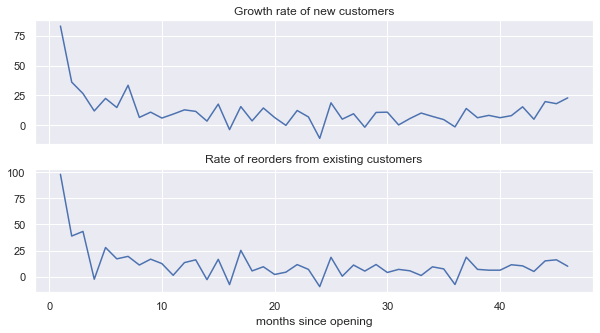

In [70]:
#comparing the two new rates, growth rate of new customers vs reorders
fig, axs = plt.subplots(2, sharex=True, figsize=(10,5))
for ax in axs.flat:
    ax.set(xlabel='months since opening')
for ax in axs.flat:
    ax.label_outer()
growth_new = (np.exp(np.diff(np.log(custType_TS_counts['new_count'])))-1)*100
x=np.arange(1,47)
growth_new= growth_new[1:]
axs[0].set_title('Growth rate of new customers')
axs[0].plot(x,growth_new)
growth_existing = (np.exp(np.diff(np.log(custType_TS_counts['existing_count'])))-1)*100
growth_existing= growth_existing[1:]
axs[1].set_title('Rate of reorders from existing customers')
axs[1].plot(x,growth_existing)
plt.savefig('growthrate')


<AxesSubplot:xlabel='created_at,created_at'>

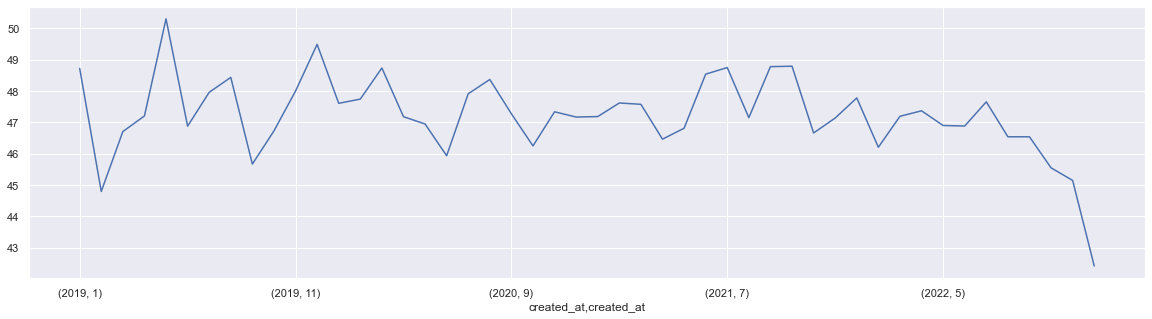

In [71]:
custType_TS_counts['Cust_Retention_percent'].plot(figsize=(20,5))

**it appears that there is a 15%increase of customers each month! However, reorder rate is low!  So, Let's look at the average amount per order**

In [72]:
#average order per month for new customers
average_orderfornewTS = custType_new.groupby([custType_new.index.year, custType_new.index.month])['sale_price'].mean()

In [73]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [74]:
avg_fornew = average_orderfornewTS.to_frame()

In [75]:
custType_new.groupby([custType_new.index.year, custType_new.index.month, 'user_id'])['sale_price'].mean().mean()

59.272190648680045

In [76]:
#average order per month for existing customers
average_orderforexistingTS = custType_existing.groupby([custType_existing.index.year, custType_existing.index.month])['sale_price'].mean()

In [77]:
avg_forexisting = average_orderforexistingTS.to_frame()

In [78]:
print('avg per order for new: ',avg_fornew.mean())
print('avg per order for existing:',avg_forexisting.mean())

avg per order for new:  sale_price    60.692828
dtype: float64
avg per order for existing: sale_price    58.898686
dtype: float64


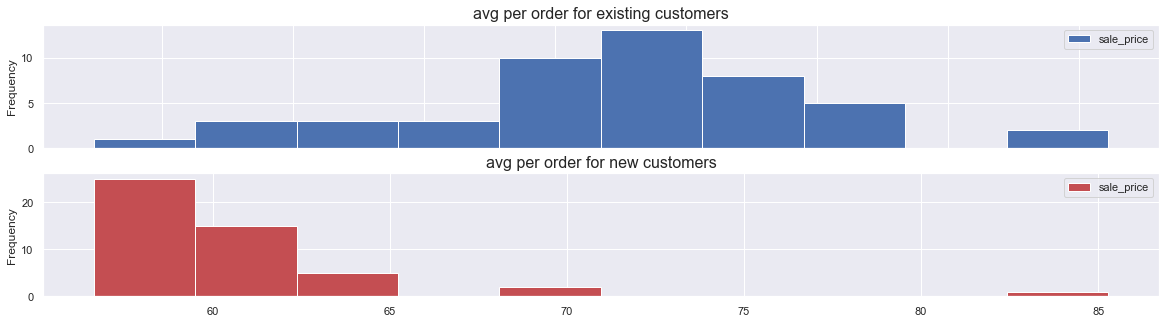

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,5))

avg_fornew.plot(kind='hist', bins=10, color='r',ax=axes[1])
avg_forexisting.plot(kind='hist', bins=10, color='b',ax=axes[0])
axes[1].set_title('avg per order for new customers', fontsize=16)
axes[0].set_title('avg per order for existing customers',fontsize=16)
for ax in axes.flat:
    ax.label_outer()
plt.savefig('AverageperOrder')

**Let's conduct a ttest to compare them**

In [80]:
#we are testing the null hypothesis that there is no difference between the avg_fornew cust and avg_for existing.
stats.ttest_ind(avg_fornew,avg_forexisting)

Ttest_indResult(statistic=array([2.26145758]), pvalue=array([0.02603616]))

**failed to reject the null hypothesis. there is no difference between avg per order for new customers and avg per order for existing customers** **My original data had a different pvalue(greater than 0.05, everytime i query p=value changes**

In [81]:
#revenue analysis
revenuerforexistingTS = custType_existing.groupby([custType_existing.index.year, custType_existing.index.month])['sale_price'].sum()

In [82]:
revenuefornewTS = custType_new.groupby([custType_new.index.year, custType_new.index.month])['sale_price'].sum()

<AxesSubplot:xlabel='created_at,created_at'>

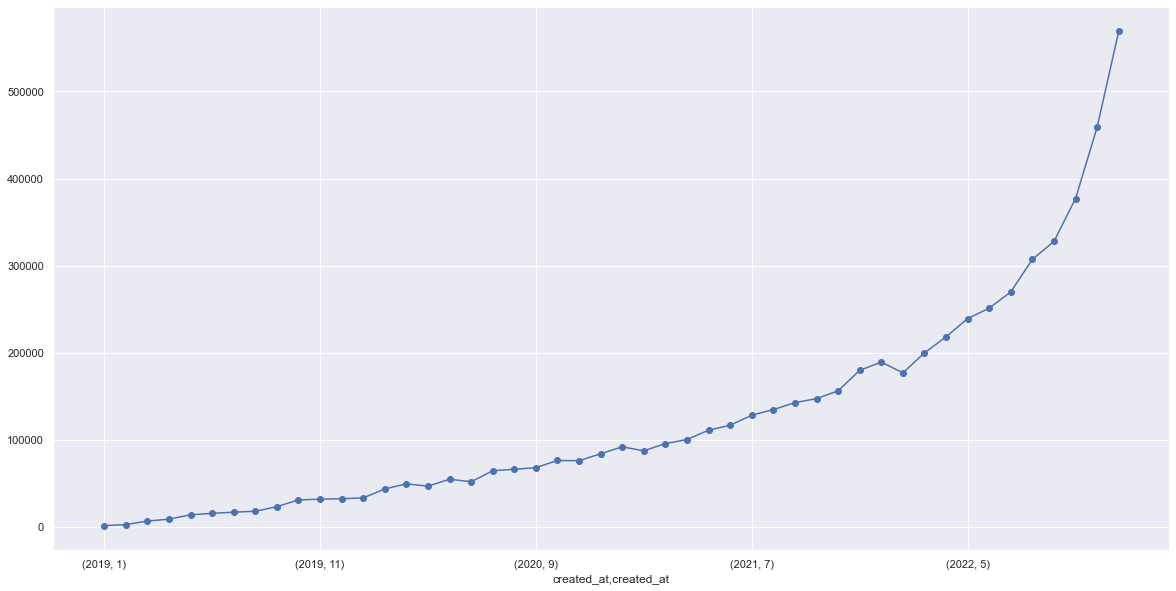

In [83]:
revenuerforexistingTS.plot(figsize=(20,10),marker='o')

<AxesSubplot:xlabel='created_at,created_at'>

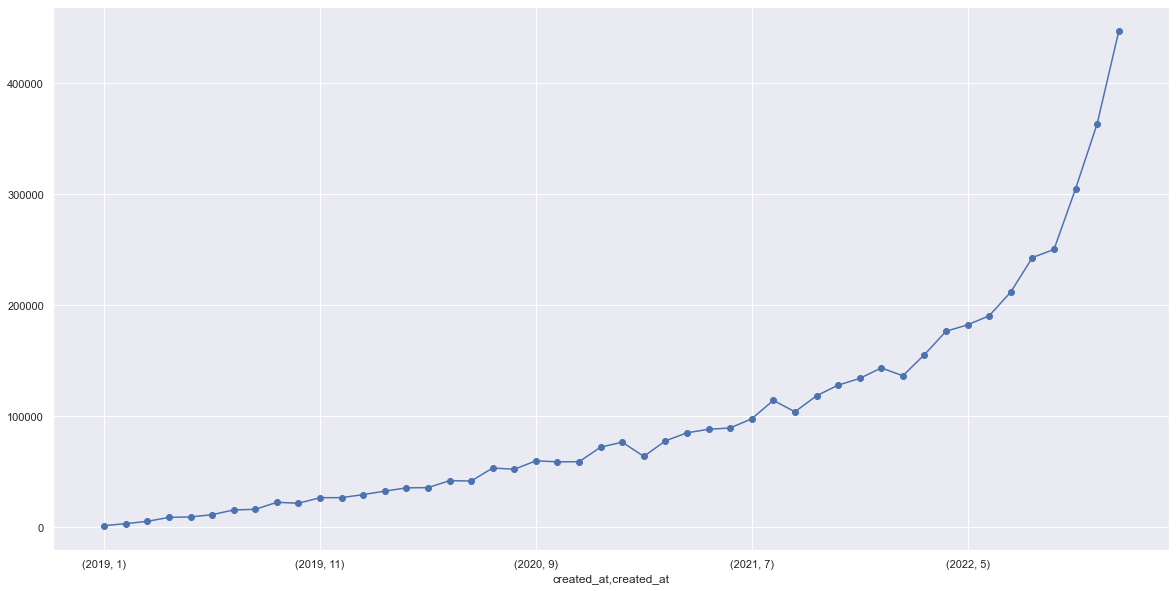

In [84]:
revenuefornewTS.plot(figsize=(20,10),marker='o')

**revenue for existing and new customers is on the rise**

# *Traffic analysis*

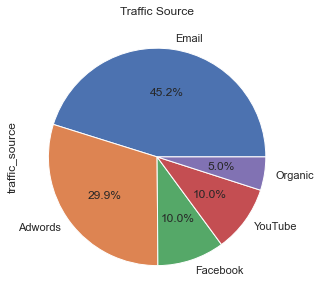

In [85]:
#initial exploration of traffic
dfevents['traffic_source'].value_counts().plot(kind='pie', figsize=(8,5),autopct='%1.1f%%')
plt.title('Traffic Source')
plt.savefig('TrafficSource')

**Almost half are coming via Email while around 30% coming through ads**

<AxesSubplot:ylabel='event_type'>

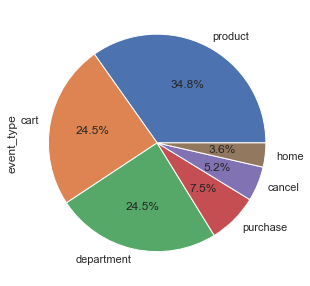

In [86]:
dfevents['event_type'].value_counts().plot(kind='pie', figsize=(8,5),autopct='%1.1f%%')

**only 7.5% go on to purchase**

In [87]:
#merging orders with events we merged with timestamp 
dfwithordersandevents= orders_daily.merge(dfevents, how='inner',left_on='created_at', right_on='created_at')

In [88]:
dfwithordersandevents.shape

(100707, 29)

<AxesSubplot:ylabel='traffic_source'>

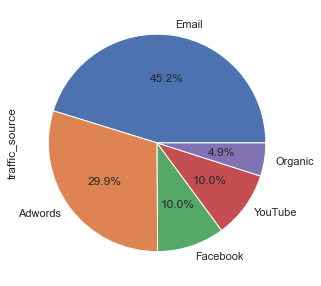

In [89]:
dfwithordersandevents['traffic_source'].value_counts().plot(kind='pie', figsize=(8,5),autopct='%1.1f%%')

<AxesSubplot:ylabel='traffic_source'>

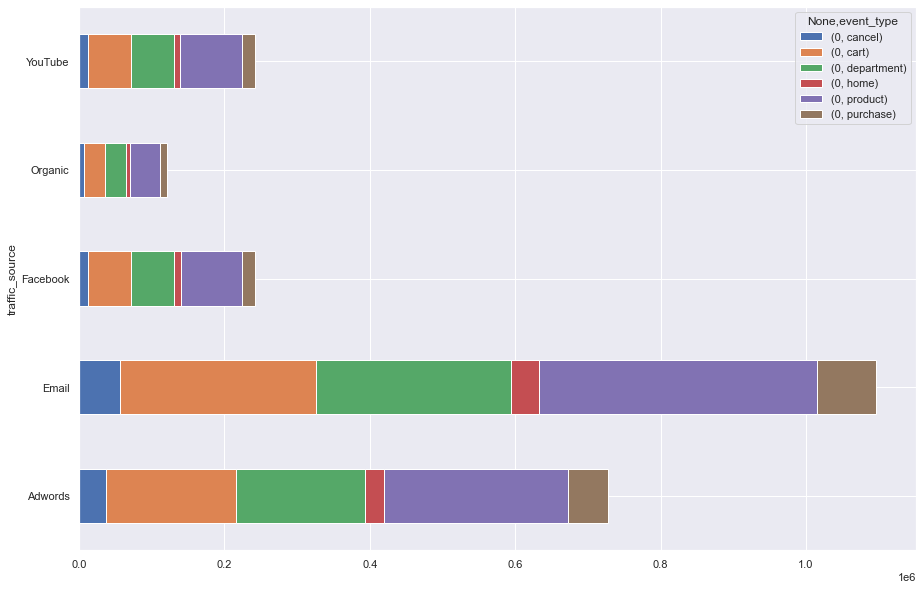

In [90]:
dfdailyevents = dfevents.groupby(['traffic_source','event_type' ]).size().to_frame()
dfdailyevents.unstack(level=1).plot(kind='barh',stacked=True, figsize=(15,10))

In [91]:
dfwithordersandevents.dtypes

created_at          datetime64[ns, UTC]
user_id_x                         Int64
cost                            float64
retailprice                     float64
product_category                 object
department                       object
brand                            object
shipped_at          datetime64[ns, UTC]
sale_price                      float64
status                           object
returnedat          datetime64[ns, UTC]
distcenter                        Int64
country                          object
gender                           object
profit                          float64
custType                         object
percentDisc                     float64
id                                Int64
user_id_y                         Int64
sequence_number                   Int64
session_id                       object
ip_address                       object
city                             object
state                            object
postal_code                      object


<AxesSubplot:xlabel='traffic_source'>

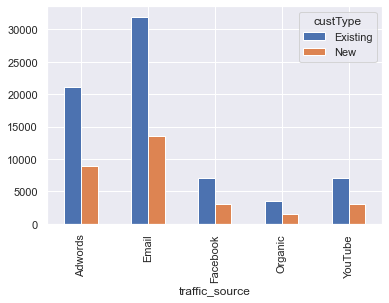

In [92]:
#count for customers by source and type
dfwithordersandevents.groupby(['traffic_source','custType'])['user_id_x'].count().unstack(level=1).plot(kind='bar')

**many existing customers visit the website via email**

In [93]:
dfdailyevents = dfevents.groupby(['traffic_source','event_type' ])['ip_address'].nunique().to_frame()

In [94]:
dfdailyevents

ip_address
traffic_source event_type            
Adwords        cancel           37628
               cart            128997
               department      128957
               home             26146
               product         204019
               purchase         54274
Email          cancel           56408
               cart            194873
               department      194765
               home             39242
               product         307465
               purchase         81894
Facebook       cancel           12465
               cart             42997
               department       43029
               home              8620
               product          67848
               purchase         18009
Organic        cancel            6298
               cart             21422
               department       21413
               home              4381
               product          33982
               purchase          9041
YouTube        cancel           12358
               cart             42830
               department       42882
               home              8646
               product          67946
               purchase         18050

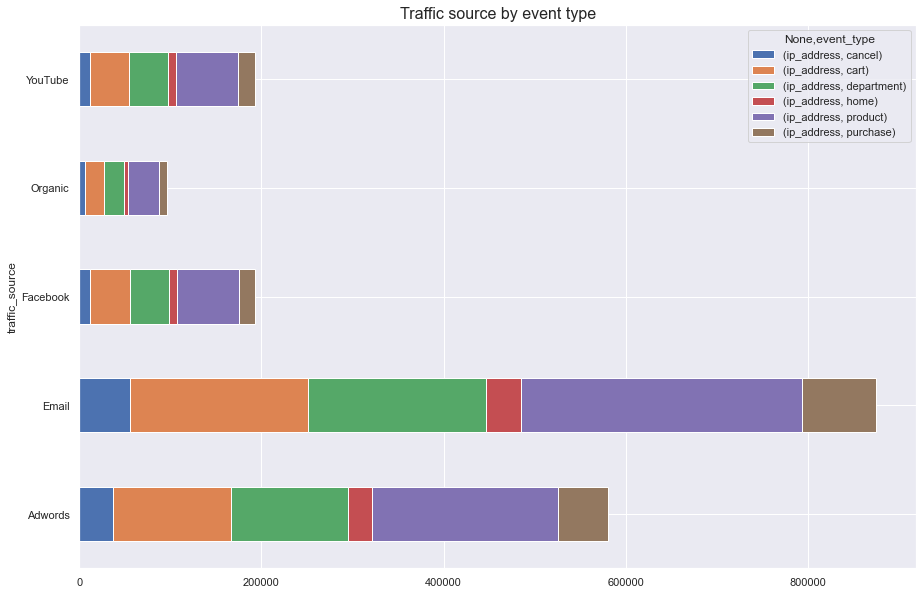

In [95]:
dfdailyevents.unstack(level=1).plot(kind='barh',stacked=True, figsize=(15,10), mark_right=True)
plt.title('Traffic source by event type', fontsize=16)
plt.savefig('TrafficSourceEventype')

**small percentage go on to purchase items**
**Many add items to cart but do not finish the purchase**